In [1]:
# 필사 참고 링크
# https://kaggle-kr.tistory.com/17?category=868316
# 타이타닉 튜토리얼 1 - Exploratory data analysis, visualization, machine learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# matplotlib의 기본 scheme 말고  seaborn scheme을 세팅하면
# 일일이 graph의 font size를 지정할 필요 없이 seaborn의 font_scale을 사용할 수 있어  편함
plt.style.use('seaborn')
sns.set(font_scale=2.5)
# sns.set_theme(style='whitegrid')

In [4]:
import missingno as msno

In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline

# **데이터 분석 작업 프로세스**
1. 데이터셋 확인
    - 대부분의 캐글 데이터는 잘 정제되어 있으나 가끔 null data존재하므로 이를 확인하고 향후 수정 필요
2. 탐색적 데이터분석(EDA)
    - 여러 feature들을 개별적으로 분석하고 feature들 간 상관관계를 확인
    - 여러 시각화 툴을 사용하여 insight 얻기
3. feature engineering
    - 모델을 선택하기 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering함.
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기
    - 머신러닝 위해 sklearn을 사용해 모델 만듬
    - 딥러닝 위해 tensorflow, pytorch 사용해 모델 만듬
5. 모델 학습 및 예측
    - trainset으로 선언한 모델 학습 시킨 후, testset을 가지고 prediction
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단
    - 풀려는 문제에 따라 모델을 평가하는 방식도 달라짐
    - 학습된 모델이 어떤 것을 학습하였는지 확인

# 1. Dataset 확인

## **1.1. load**

In [7]:
train_data_path = './dataset/titanic/train.csv'
test_data_path = './dataset/titanic/test.csv'

In [8]:
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.2. **각 피쳐 고유값 확인**

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# df_train['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
df_train['Survived'].sort_values().unique()

array([0, 1], dtype=int64)

In [13]:
df_train['Pclass'].sort_values().unique()

array([1, 2, 3], dtype=int64)

In [14]:
# df_train['Name'].sort_values().unique()

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

In [15]:
df_train['Sex'].sort_values().unique()

array(['female', 'male'], dtype=object)

In [16]:
df_train['Age'].sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [17]:
df_train['SibSp'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [18]:
df_train['Parch'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
df_train['Ticket'].sort_values().unique()

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

In [20]:
# df_train['Fare'].sort_values().unique()

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [21]:
# df_train['Cabin'].sort_values().unique()

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [22]:
df_train['Embarked'].sort_values().unique()

array(['C', 'Q', 'S', nan], dtype=object)

|변수(feature, variable)|정의|설명|타입|
|-----|-----|-----|-----|
|PassengerId|승객 번호| 고유 id|integer|
|Survived|생존 여부|target label로서 0=생존, 1=죽음|integer|
|Pclass|티켓 등급|1=1st, 2=2nd, 3=3rd 등급으로 나뉘며 categorical feature|integer|
|Name|이름|이름|string|
|Sex|성별|male=남자, female=여자로 구분되며 binary|string|
|Age|나이|continuous|integer|
|SibSp|함게 탑승한 형제, 자매 및 배우자의 수|quantitative|integer|
|Parch|함께 탑승한 부모, 아이의 수|quantitative|integer|
|Ticket|티켓 번호|alphabet + integer|string|
|Fare|탑승료|cotinuous|float|
|Cabin|객실 번호|alphabet + interger|string|
|Embarked|탑승 항구|C=Cherbourg, Q=Queenstown, S=Southampton|string|

- 데이터셋의 각 피쳐(칼럼)이 무엇을 의미하는지 미리 파악하는 게 중요

## **1.3. 기초통계량 확인**

In [23]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 승객의 ID값을 나타내는 'PassengerId' 칼럼의 기초통계량 count와 'Age', 'Fare'의 count가 불일치하는 것으로미루어보아 결측치가 존재하는 것을 알 수 있음

## 1.4 Null data check

In [131]:
df_train.agg(lambda x: sum(x.isnull()) / len(df_train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [132]:
df_test.agg(lambda x: sum(x.isnull()) / len(df_test))

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

- missingno(msno) 라이브러리를 사용하여 null data 쉽게 보기

<AxesSubplot:>

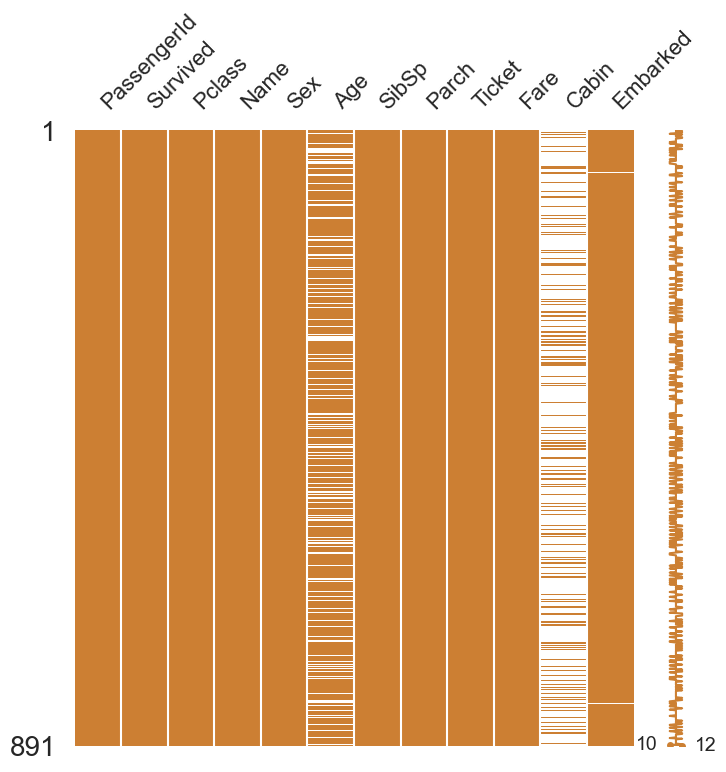

In [27]:
msno.matrix(df=df_train, figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

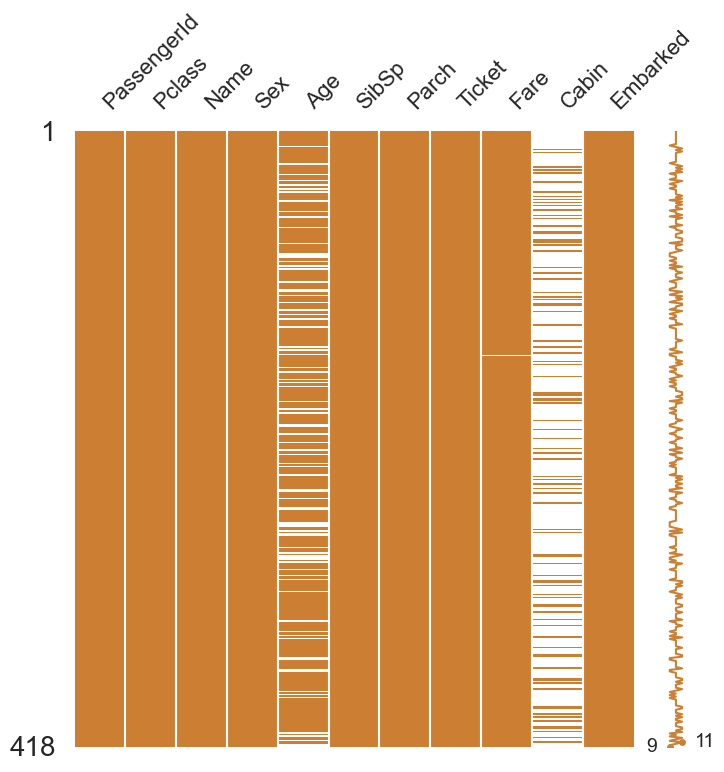

In [28]:
msno.matrix(df=df_test, figsize=(8, 8), color=(0.8, 0.5, 0.2))

## **1.5. Target label 확인**

- target label이 어떤 distribution을 가지고 있는지 확인
- 현 데이터셋과 같이 binary classification 문제의 경우 1과 0의 분포에 따라 모델의 평가방법이 달라짐

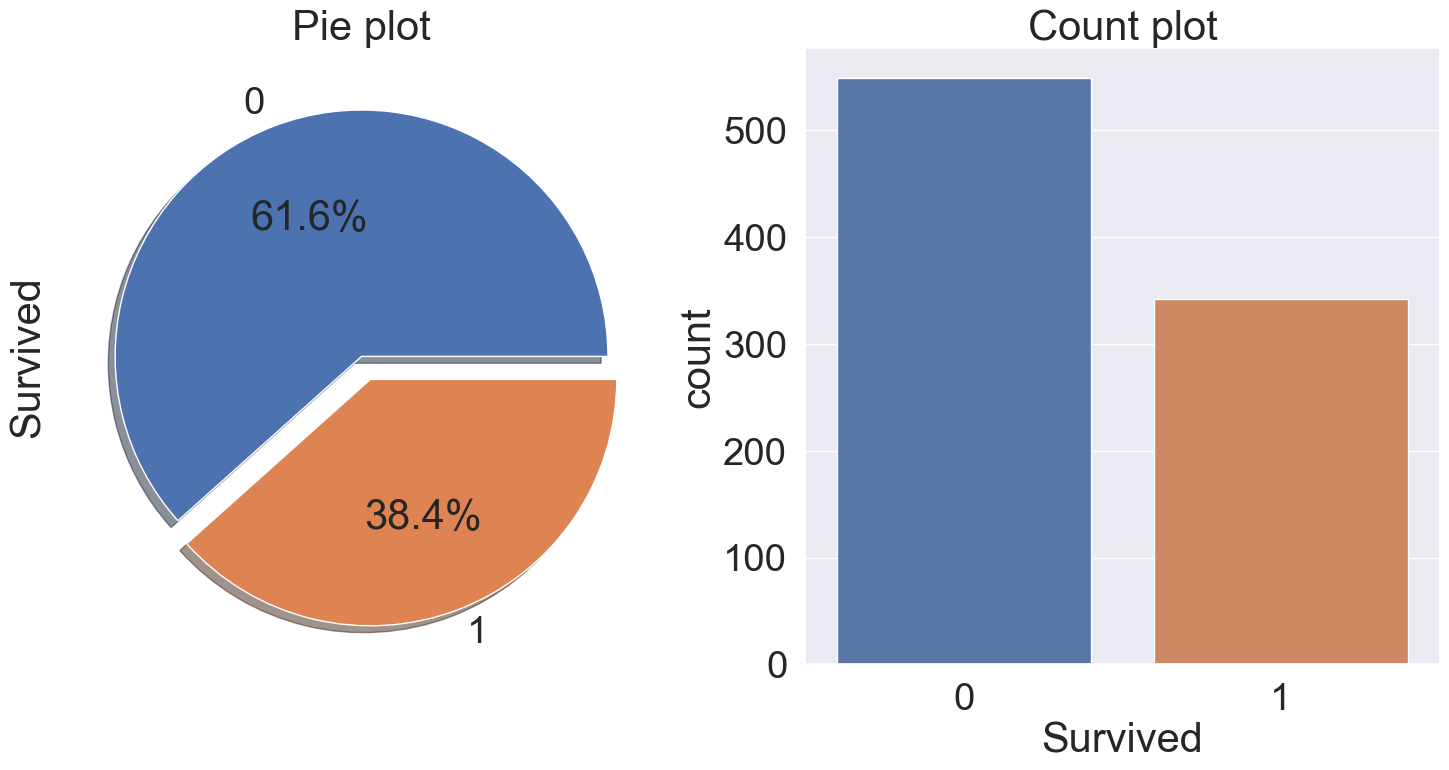

In [173]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%',
                                             shadow=True,
                                             ax=ax[0])
ax[0].set_title('Pie plot')

sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Count plot')

plt.show()

# **2. Exploratory Data Analysis(EDA)**

- 데이터 안에 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요
- 특정 목적에 맞는 소스코드를 정리해두어 필요할때마다 참고해서 적용할 것

## **2.1. Pcalss**

- categorical & ordinal data
- Pclass에 따른 생존률 차이 살펴보기

In [134]:
# Pcalss 별 탑승객 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [135]:
# Pclass 별 생존자 수
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [136]:
# Pcalss 별 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [137]:
# 위의 과정을 쉽게 보기
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

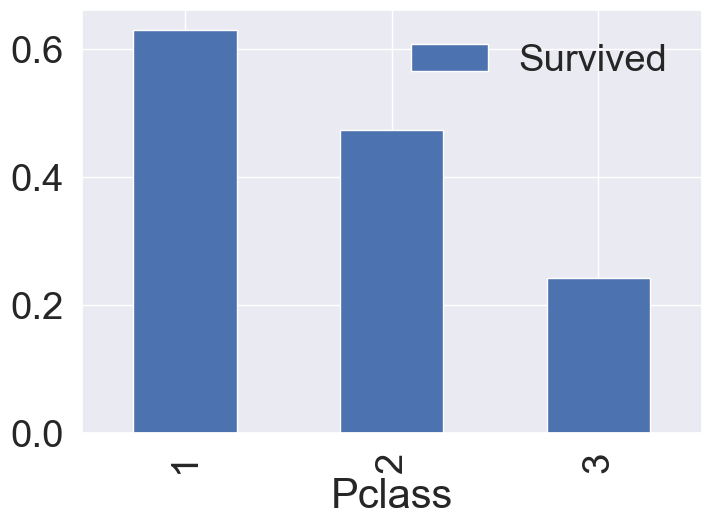

In [138]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar()

- 보이는 바와 같이 Pclass가 좋을수록(1>2>3) 생존률이 높은 것을 확인 할 수 있음

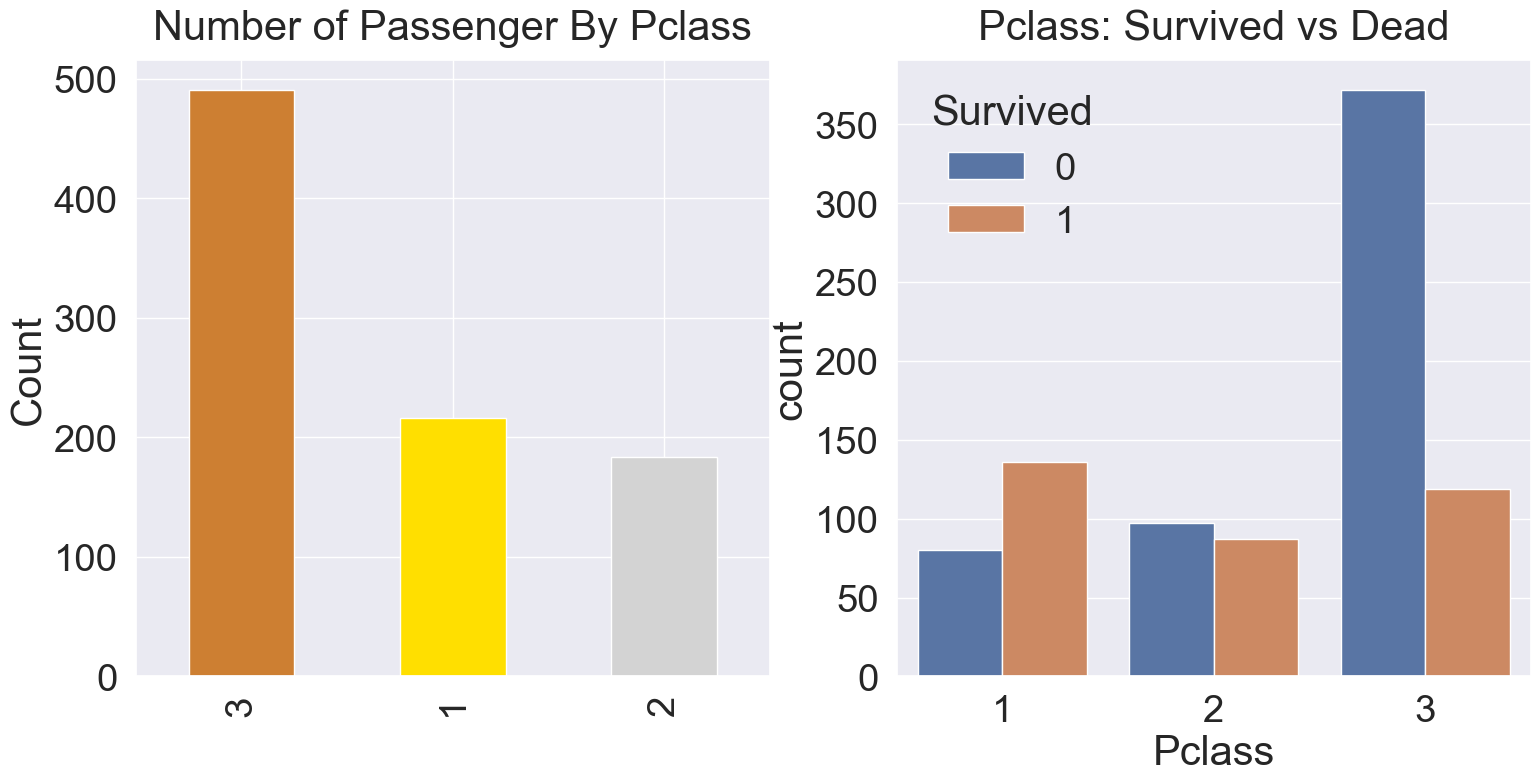

In [190]:
y_position = 1.02
_, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'],
                                           ax=ax[0])
ax[0].set_title('Number of Passenger By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# hue는 색을 의미하며, 각 범주형 데이터를 색상으로 구분해줌
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을수록 생존확률이 높음
- 이를 통해 생존에 Pclass가 큰 영향을 미친다고 추측할 수 있으며, 나중에 모델링 수행 시 이 feature를 사용하면 좋을 것이라 기대할 수 있음

## **2.2. Sex**

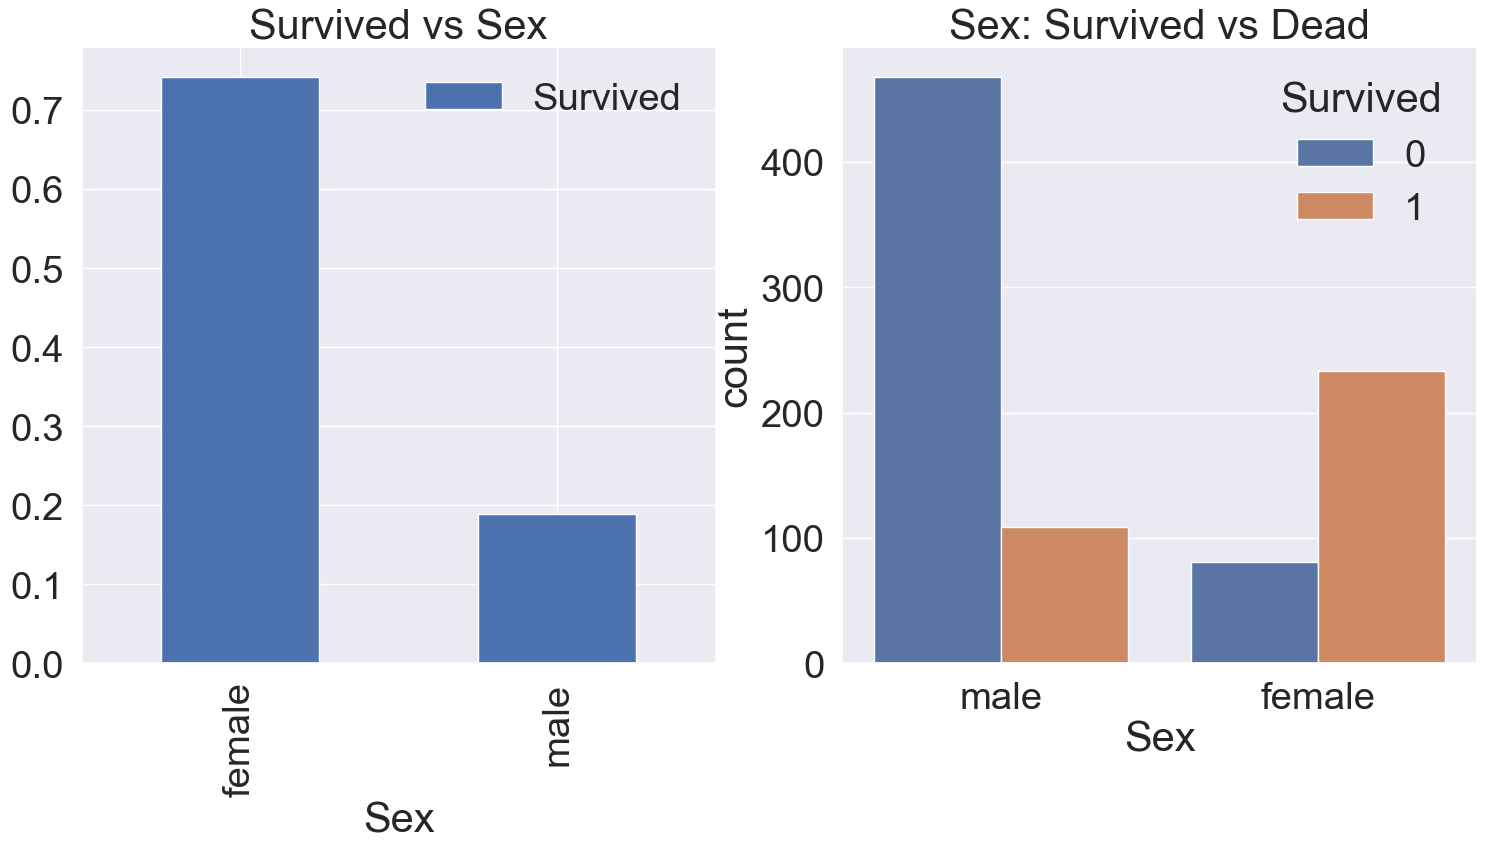

In [197]:
_, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()